# Trading Bot

Welcome to our trading bot for Dow Jones stocks. This bot helps you to earn a lot of money.  
Just follow the instructions. 

### Before we can start, we first have to import a few libraries

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from own_jupyter_controls import dropdown_widget, generate_file_path_for_stock_data, network_architecture_widget
from stock_pred import train_bot
from trading import trading
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Selecting stock
Please select the ticker symbol of the Dow Jones stock your interested in.
First run the cell. Then select the ticker symbol from the dropdown-menu, then run the next Cell. Check the output of the next cell to see if the right stock is selected. In case the dropdown menu does not work because you use jupyter labs follow the instructions in the next cell.

In [2]:
widget = dropdown_widget()
display(widget)

interactive(children=(Dropdown(description='Symbol', options=('MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO'…

In [3]:
file_path = generate_file_path_for_stock_data(widget.kwargs['x'])
# If the dropdown menu does not work uncomment the following line and enter your ticker symbol
# file_path = 'data/daily_[TickerSymbol].csv'
print("The file path to your data is '" + file_path + "'")

The file path to your data is 'data/daily_MSFT.csv'


## Predicting stock
Next we train a neural network to learn to predict the course development of our selected stock. 
<br>
<br>
But first we have to select the hyperparameters of our network!  

In [4]:
# Network hyperparameters
two_lstm_layers=False
number_of_neurons_lstm=50 # Only use integers
two_layers_second_branch=False
number_of_neurons_second_branch=20 # Only use integers
dropout_rate=0.2 # Defines the dropout rate

# Feature parameters
history_points = 50 # Do not set below 50; Only use integers
s_and_p_500 = False # Use the S&P 500 features
ma7 = True # Use a moving average of the last 7 days
ma21 = True # Use a moving average of the last 21 days
ma_his_window = True # Use a moving average of the length of the history window
ema12 = True # Use an expoential moving average of the last 12 days
ema26 = True # Use an expoential moving average of the last 26 days
mac = True # Use an expoential moving average conversion diversion
ten_day_momentum = True # Use a 10 day momentum
upper_bands = True # Use upper bands as a feature
lower_bands = True # Use lower bands as a feature
volatilty_index_feature = True # Use volatility as a feature
fourier = 0 # Use a fourier transformation 0 if you don't want to use the feature and only use integers
dollar_currency_index = False # Use the dollar index as a feature

# Training parameters
number_of_epochs = 50 # Define the number of training epochs

In [5]:
error, values_original, values_predicted, ohlcv_test, tech_ind_test, model, y_normaliser = train_bot(file_path=file_path, 
                                                                                                     history_points=history_points, 
                                                                                                     number_of_epochs=number_of_epochs, 
                                                                                                     two_lstm_layers=two_lstm_layers, 
                                                                                                     number_of_neurons_lstm=number_of_neurons_lstm,
                                                                                                     two_layers_second_branch=two_layers_second_branch, 
                                                                                                     number_of_neurons_second_branch=number_of_neurons_second_branch, 
                                                                                                     dropout_rate=dropout_rate, 
                                                                                                     s_and_p_500=s_and_p_500, 
                                                                                                     ma7=ma7, 
                                                                                                     ma21=ma21, 
                                                                                                     ma_his_window=ma_his_window, 
                                                                                                     ema12=ema12, 
                                                                                                     ema26=ema26, 
                                                                                                     mac=mac, 
                                                                                                     ten_day_momentum=ten_day_momentum,
                                                                                                     upper_bands=upper_bands, 
                                                                                                     lower_bands=lower_bands,
                                                                                                     volatilty_index_feature=volatilty_index_feature,
                                                                                                     fourier=fourier,
                                                                                                     dollar_currency_index=dollar_currency_index)

Train on 4032 samples, validate on 448 samples
Epoch 1/50
 - 4s - loss: 0.0504 - val_loss: 0.0024
Epoch 2/50
 - 3s - loss: 0.0020 - val_loss: 3.4738e-04
Epoch 3/50
 - 3s - loss: 0.0015 - val_loss: 2.2680e-04
Epoch 4/50
 - 4s - loss: 0.0011 - val_loss: 1.4554e-04
Epoch 5/50
 - 3s - loss: 8.1965e-04 - val_loss: 1.6042e-04
Epoch 6/50
 - 3s - loss: 6.3101e-04 - val_loss: 1.8513e-04
Epoch 7/50
 - 3s - loss: 5.3933e-04 - val_loss: 3.1696e-04
Epoch 8/50
 - 3s - loss: 4.8018e-04 - val_loss: 1.5460e-04
Epoch 9/50
 - 3s - loss: 3.9970e-04 - val_loss: 1.9148e-04
Epoch 10/50
 - 3s - loss: 3.5020e-04 - val_loss: 8.7896e-05
Epoch 11/50
 - 3s - loss: 3.4802e-04 - val_loss: 6.5684e-05
Epoch 12/50
 - 3s - loss: 3.2016e-04 - val_loss: 6.2896e-05
Epoch 13/50
 - 4s - loss: 3.0854e-04 - val_loss: 8.6190e-05
Epoch 14/50
 - 4s - loss: 2.6192e-04 - val_loss: 1.4651e-04
Epoch 15/50
 - 4s - loss: 2.6966e-04 - val_loss: 6.6533e-05
Epoch 16/50
 - 4s - loss: 2.5170e-04 - val_loss: 9.0400e-05
Epoch 17/50
 - 3s - lo

### The error of our network

In [6]:
print("The Mean-squared error of our network on the test set is " + "{:10.3f}".format(error))

The Mean-squared error of our network on the test set is      3.775


#### Plot of our network's performance on the test set

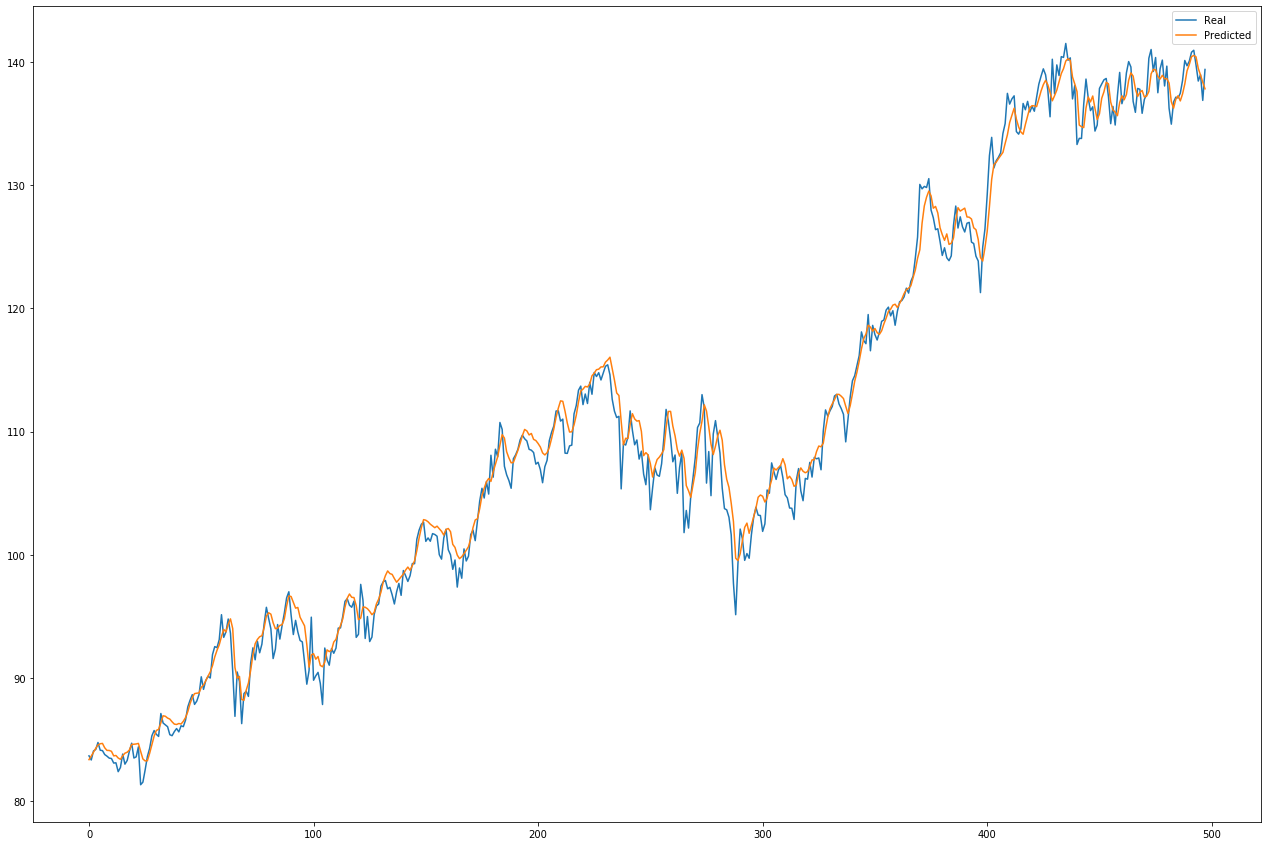

In [7]:
plt.gcf().set_size_inches(22, 15, forward=True)
real = plt.plot(values_original, label='real')
pred = plt.plot(values_predicted, label='predicted')
plt.legend(['Real', 'Predicted'])
# Delete the comment to save the plot
save_string = str(widget.kwargs['x']) + '.png'
plt.savefig(save_string)
plt.show()

## Trading stock
With the predictions working we can trade stock. Let's see how our bot would have performed on the test set when trading stock.  
</br>  
</br>
If you want to see the results for a different purchase amount please change the variable below.   
</br>  
</br>
If the last trade(s) is/are a buy order, they do not get executed, in order to have compare all the returns.

In [8]:
purchase_amt = 100 # Select here your purchase amount
trading_cost = 0 # Select your trading cost
buys, sells = trading(ohlcv_test, tech_ind_test, y_normaliser, model, purchase_amt, trading_cost)

The numbers of buys and sells that our bot would have taken
buys: 363
sells: 60
The money our bot would have earned
earnings: $955.0554619909424


#### Let's plot our bot's trading patterns

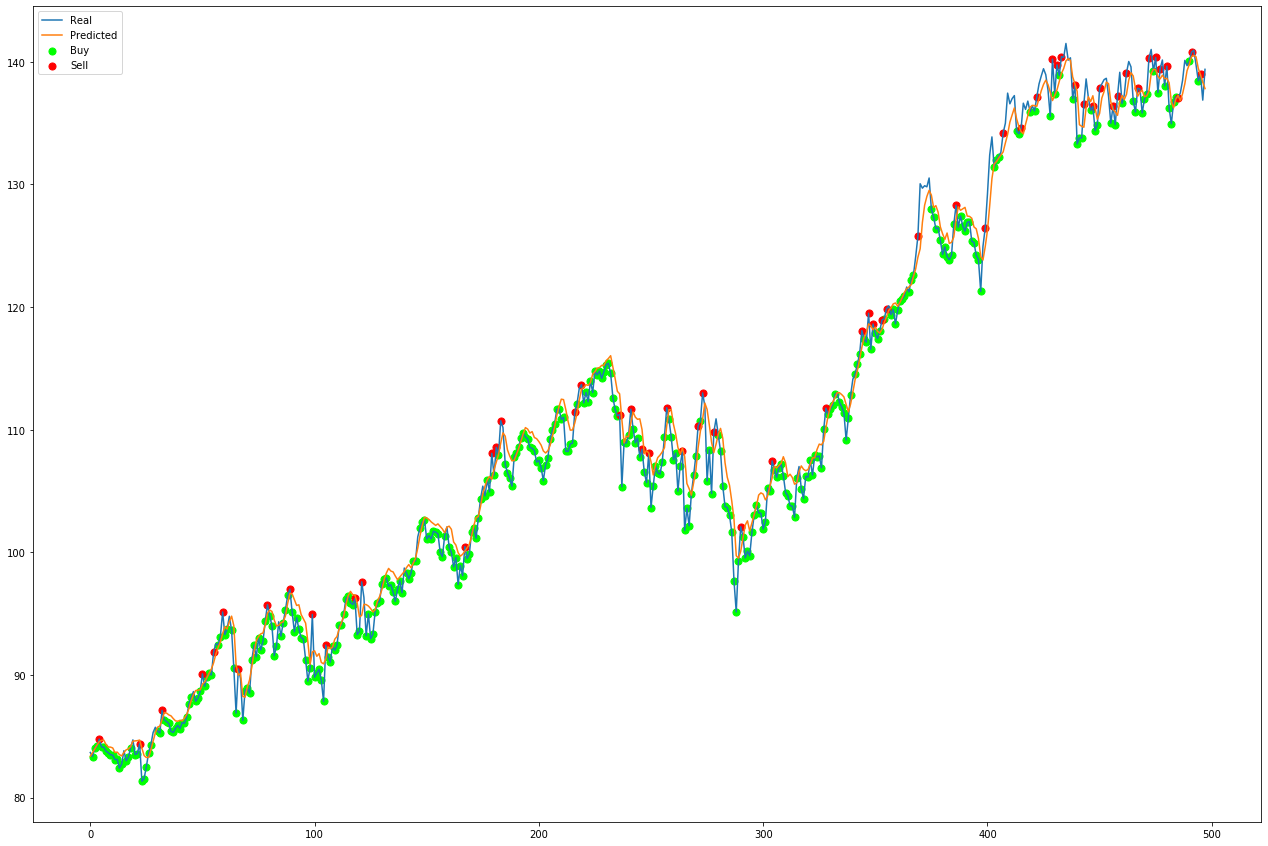

In [9]:
plt.gcf().set_size_inches(22, 15, forward=True)
real = plt.plot(values_original, label='real')
pred = plt.plot(values_predicted, label='predicted')
if len(buys) > 0:
    plt.scatter(list(list(zip(*buys))[0]), list(list(zip(*buys))[1]), c='#00ff00', s=50)
if len(sells) > 0:
    plt.scatter(list(list(zip(*sells))[0]), list(list(zip(*sells))[1]), c='#ff0000', s=50)
# real = plt.plot(unscaled_y[start:end], label='real')
# pred = plt.plot(y_predicted[start:end], label='predicted')
plt.legend(['Real', 'Predicted', 'Buy', 'Sell'])
# Delete the comment to save the plot
save_string = str(widget.kwargs['x']) + '.png'
plt.savefig(save_string)
plt.show()